# Influencing factors of happiness

The purpose of choosing this work is to find out which factors are more important to live a happier life. As a result, people and countries can focus on the more significant factors to achieve a higher happiness level. Implement machine learning algorithm to predict the happiness score.

In [154]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [155]:
#happy= pd.read_csv('happy.csv')
happy=pd.read_excel('happy.xls')
location=pd.read_csv('location.csv')

In [156]:
happy.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 26 columns):
Country name                                                1704 non-null object
Year                                                        1704 non-null int64
Life Ladder                                                 1704 non-null float64
Log GDP per capita                                          1676 non-null float64
Social support                                              1691 non-null float64
Healthy life expectancy at birth                            1676 non-null float64
Freedom to make life choices                                1675 non-null float64
Generosity                                                  1622 non-null float64
Perceptions of corruption                                   1608 non-null float64
Positive affect                                             1685 non-null float64
Negative affect                                             1691 non-null fl

In [158]:
happy.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WV

# Cleaning 

In [159]:
happy.rename(columns={'Country name':'Country','Life Ladder':'Happiness_score','Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Corruption', 
                      'Healthy life expectancy at birth':'Life_expectancy','Log GDP per capita':'log_GDP', 
                     'Social support':'Social_support','Positive affect':'Positive_affect','Negative affect':'Negative_affect'
                     
                     }, inplace=True)

In [160]:
happy.columns

Index(['Country', 'Year', 'Happiness_score', 'log_GDP', 'Social_support',
       'Life_expectancy', 'Freedom', 'Generosity', 'Corruption',
       'Positive_affect', 'Negative_affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014'],
      dtype='object')

In [161]:
happy.drop(happy.iloc[:, 11:], inplace = True, axis = 1)

In [162]:
is_2018 =  happy['Year']==2018
happy = happy[is_2018]
happy=happy.reset_index(drop=True)

In [163]:
happy.head()

,Country,Year,Happiness_score,log_GDP,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Positive_affect,Negative_affect
0,Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904
1,Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997
2,Algeria,2018,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946
3,Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502
4,Armenia,2018,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840


In [164]:
happy=happy.drop(['Year'], axis=1)

In [165]:
happy.head()

,Country,Happiness_score,log_GDP,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Positive_affect,Negative_affect
0,Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997
2,Algeria,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946
3,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502
4,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840


In [166]:
happy.describe()

,Happiness_score,log_GDP,Social_support,Life_expectancy,Freedom,Generosity,Corruption,Positive_affect,Negative_affect
count,136.000000,127.000000,136.000000,132.000000,136.000000,126.000000,129.000000,135.000000,135.000000
mean,5.502134,9.250394,0.810544,64.670832,0.784535,-0.029086,0.731744,0.709628,0.293670
std,1.103461,1.186589,0.116332,6.728247,0.117821,0.156355,0.186574,0.111807,0.088841
min,2.694303,6.541033,0.484715,48.200001,0.373536,-0.336385,0.096563,0.424125,0.092696
25%,4.721326,8.346278,0.739719,59.074999,0.718168,-0.150491,0.691070,0.639331,0.219076
50%,5.468088,9.415703,0.836641,66.350002,0.795636,-0.038196,0.793091,0.735343,0.287358
75%,6.277691,10.166517,0.905608,69.075001,0.877017,0.063073,0.851382,0.794049,0.359979
max,7.858107,11.453928,0.984489,76.800003,0.969898,0.499378,0.952014,0.883581,0.543836


In [167]:
happy.isna().sum()

Country             0
Happiness_score     0
log_GDP             9
Social_support      0
Life_expectancy     4
Freedom             0
Generosity         10
Corruption          7
Positive_affect     1
Negative_affect     1
dtype: int64

In [168]:
nans = lambda df: df[df.isnull().any(axis=1)]
test = nans(happy)

In [169]:
happy=happy.dropna(how='any') 

# Visualization

In [170]:
#happy = happy.fillna(happy.median())

Correlation plot

Let’s see the correlation between numerical variables in our dataset.

In [171]:
mat_corr= happy.corr()

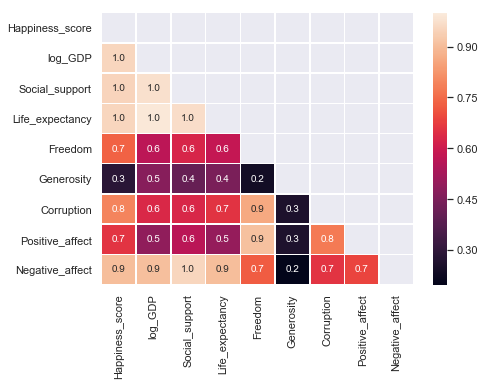

In [274]:
# Generate a mask for the upper triangle

f,ax = plt.subplots(figsize=(7, 5))
mask = np.zeros_like(mat_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(abs(mat_corr.corr()),mask=mask,annot=True,linewidths=.5, fmt= '.1f',ax=ax)

plt.show()

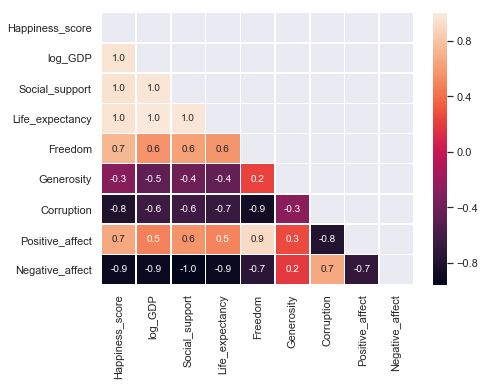

In [275]:
f,ax = plt.subplots(figsize=(7, 5))
mask = np.zeros_like(mat_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(mat_corr.corr(),mask=mask,annot=True,linewidths=.5, fmt= '.1f',ax=ax)

plt.show()

According to the cor plot, Economy, life expectancy(health), and social support(family) play the most significant role in contributing to happiness. Freedom and generosity have a lower impact on the happiness score.

In [174]:
#strong correlation between:
#positive: social support & log GDP
#positive: life expectancy & (log GDP, social support )
#negative: negative affect & (log GDP, social support, life expectancy, freedom)
#negative : corruption & freedom
#positive: positive affect & freedom , negative: positive affect & corruption

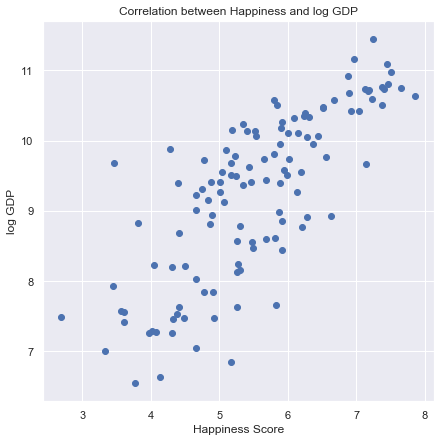

In [271]:
happiness_score = happy['Happiness_score']
GDP = happy['log_GDP']

plt.figure(figsize=(7,7))
plt.scatter(happiness_score,GDP)
plt.title('Correlation between Happiness and log GDP')
plt.xlabel('Happiness Score')
plt.ylabel('log GDP')
plt.show()


Positively correlated : The country having a high GDP has more Happiness Score

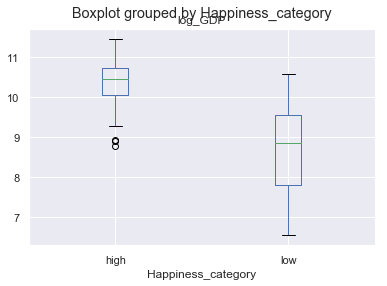

In [177]:
happy["Happiness_category"] = ["high" if i > 6 else "low" for i in happy.Happiness_score]
happy.loc[:10 , ["Country","Happiness_category"]]


happy.boxplot(column = 'log_GDP', by = 'Happiness_category')
plt.show()


In [231]:
happy=happy.drop(['Happiness_category'], axis=1)

Black line at top is the max value.
Blue line at top is the secont quartile (%75)
Green line is median (%50)
Blue line at bottom is first quartile (%25)
Black line at bottom is min value.
Black circle is the outlier !!



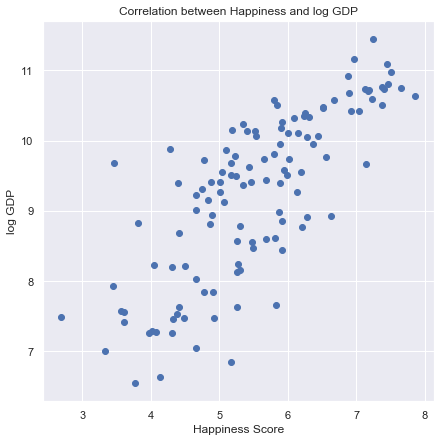

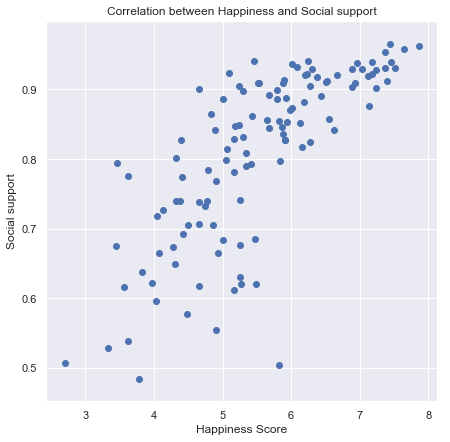

In [268]:
happiness_score = happy['Happiness_score']
social_support=happy['Social_support']

plt.figure(figsize=(7,7))
plt.scatter(happiness_score,social_support)
plt.title('Correlation between Happiness and Social support')
plt.xlabel('Happiness Score')
plt.ylabel('Social support')
plt.show()


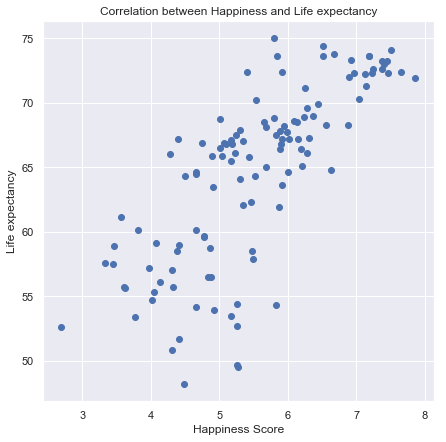

In [269]:
happiness_score = happy['Happiness_score']
life_expectancy=happy['Life_expectancy']

plt.figure(figsize=(7,7))
plt.scatter(happiness_score,life_expectancy)
plt.title('Correlation between Happiness and Life expectancy')
plt.xlabel('Happiness Score')
plt.ylabel('Life expectancy')
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



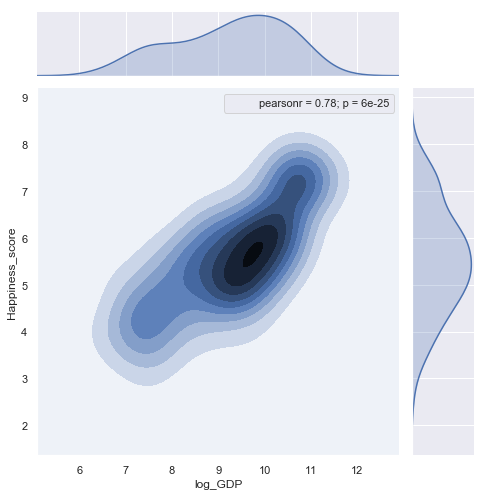

In [233]:
import scipy.stats as stats
g = sns.jointplot(happy.log_GDP, happy.Happiness_score, kind = "kde", height = 7)
g.annotate(stats.pearsonr)
plt.show()

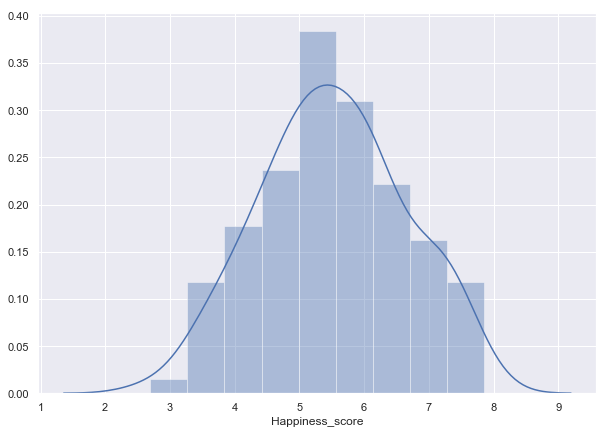

In [258]:
plt.figure(figsize=(10,7))
sns.distplot(happy['Happiness_score'])
plt.show()

In [276]:

#conda install plotly==2.7.0
#Global Happiness Ranking
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

data = dict(type = 'choropleth', 
           locations = happy['Country'],
           locationmode = 'country names',
           z = happy['Happiness_score'], 
           text = happy['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'World Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)





We can see this positive relationship between happiness score and economy from scatterplot.


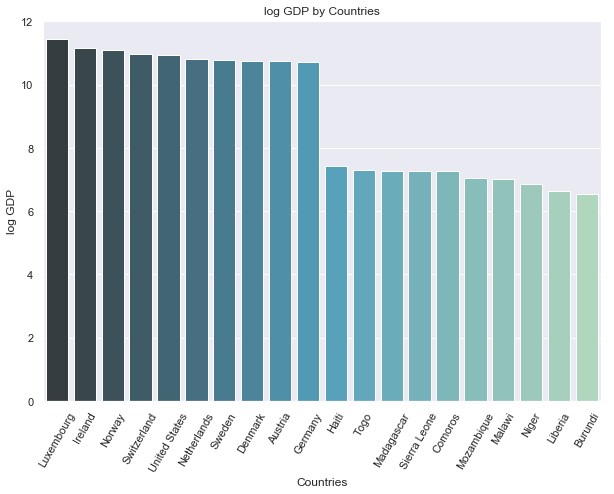

In [236]:
smallest = happy.sort_values('log_GDP', ascending=False)
largest_ten= happy.nlargest(10,'log_GDP').append(smallest.tail(10))

plt.figure(figsize=(10,7))
sns.barplot(x='Country', y='log_GDP',data=largest_ten, palette = sns.color_palette("GnBu_d",20) )
plt.xticks(rotation= 60)
plt.xlabel('Countries')
plt.ylabel('log GDP')
plt.title('log GDP by Countries')
plt.show()

Comparing different continents regarding their happiness variables

Let’s calculate the average happiness score and the average of the other seven variables for each continent. Then melt it to have variables and values in separate columns. Finally, using ggplot to show the difference between continents.


In [277]:
gen=happy.sort_values(by="Generosity",ascending="True")[:10].reset_index(drop=True)
generosity=gen.append(happy.sort_values(by="Generosity",ascending="False")[:10].reset_index())
generosity=generosity.reset_index(drop=True)
generosity=generosity.drop('index',axis=1)


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [238]:
generosity=happy[happy.Generosity>0].nlargest(10,'Generosity')

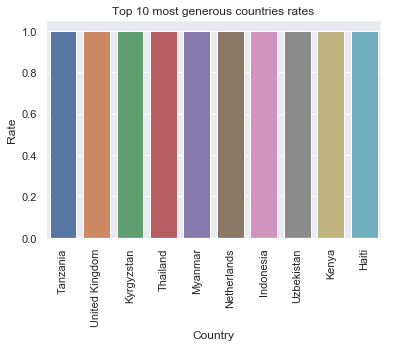

In [239]:
sns.barplot(x=generosity.Country.value_counts().index,y=generosity.Country.value_counts().values)
plt.xlabel("Country")
plt.ylabel("Rate")
plt.xticks(rotation=90)
plt.title("Top 10 most generous countries rates")
plt.show()

# Prediction

In [244]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [252]:
# PCA  data = happy 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = happy.iloc[:, 1:12].values
x = StandardScaler().fit_transform(x)

pca_res = PCA(n_components=2)
principalComponents_res = pca_res.fit_transform(x)

principal_res_Df = pd.DataFrame(data = principalComponents_res
            , columns = ['principal component 1', 'principal component 2'])
principal_res_Df.index = happy.Country
print('Explained variation per principal component: {}'.format(pca_res.explained_variance_ratio_))

Explained variation per principal component: [0.49937505 0.19595859]


In [281]:
print(principalComponents_res.shape)
print(happy.shape)

(118, 2)
(118, 10)


In [288]:
#pca_res.fit(x).components_

array([[-0.41765253, -0.41080311, -0.41199631, -0.40382001, -0.29122082,
         0.03243741,  0.23951649, -0.2594433 ,  0.33683065],
       [-0.02149437, -0.26562659, -0.18310574, -0.22588432,  0.42847675,
         0.59701624, -0.34576206,  0.42779894,  0.04295355]])

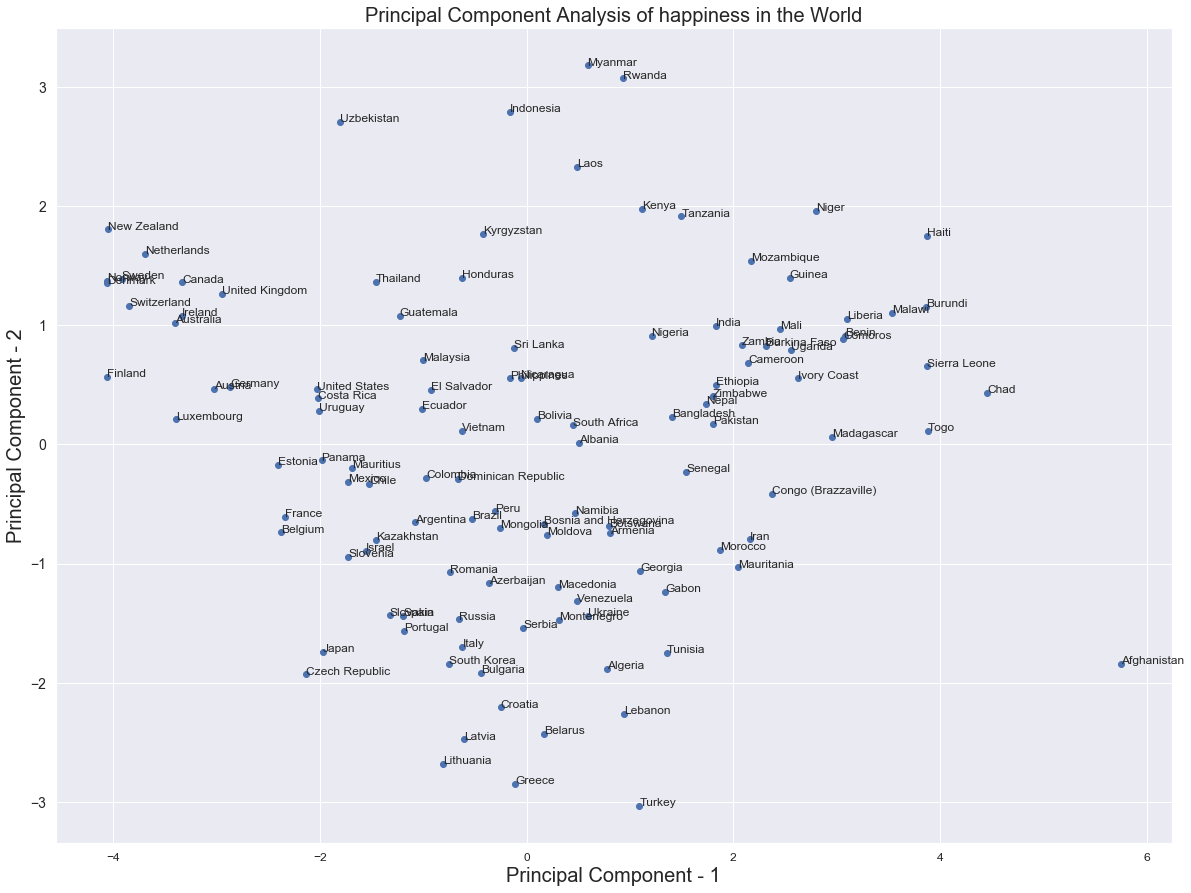

In [253]:
plt.figure(figsize=(20,15))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of happiness in the World",fontsize=20)
plt.scatter(principal_res_Df['principal component 1'], principal_res_Df['principal component 2'])
#plt.legend(targets,prop={'size': 15})

for name in happy.Country:
    plt.annotate(name, (principal_res_Df.loc[name, 'principal component 1'], principal_res_Df.loc[name, 'principal component 2']), fontsize=12)
#plt.legend(targets,prop={'size': 15})
plt.show()

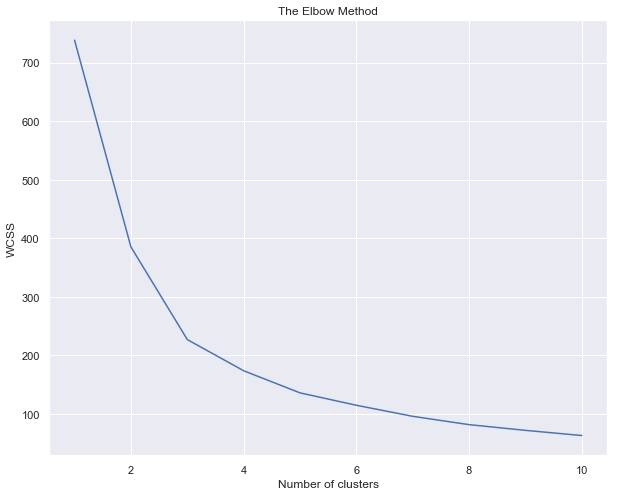

In [254]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(principal_res_Df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [255]:
# Fitting K-Means to the dataset

dataset1=principal_res_Df
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(principal_res_Df)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# Adding cluster to the Dataset1
dataset1['cluster'] = y_kmeans1

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,principal component 1,principal component 2
cluster,,
1,-0.3,-1.4
2,-0.1,1.3
3,2.7,0.5
4,-3.0,0.6


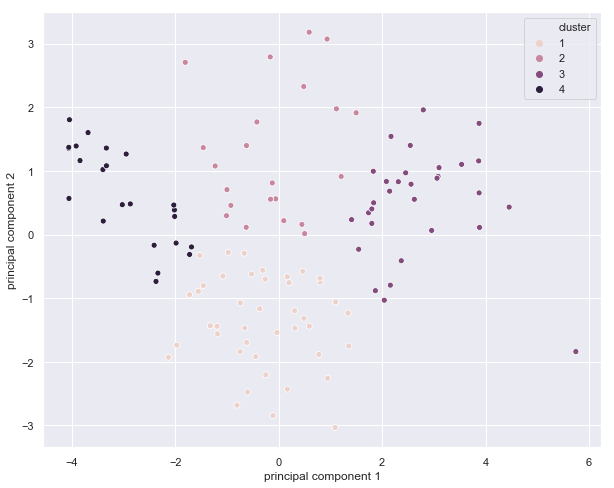

In [256]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster",  data=dataset1)
plt.show()

In [257]:
#explore data through visualization
#import WorldCloud
#apply OLS on PCA